## Iris 데이터셋 PCA 이용하여 차원 축소

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import re

#### 데이터셋 불러오기

In [2]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
target_names = iris.target_names

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### PCA 적용 전 데이터 차원 시각화

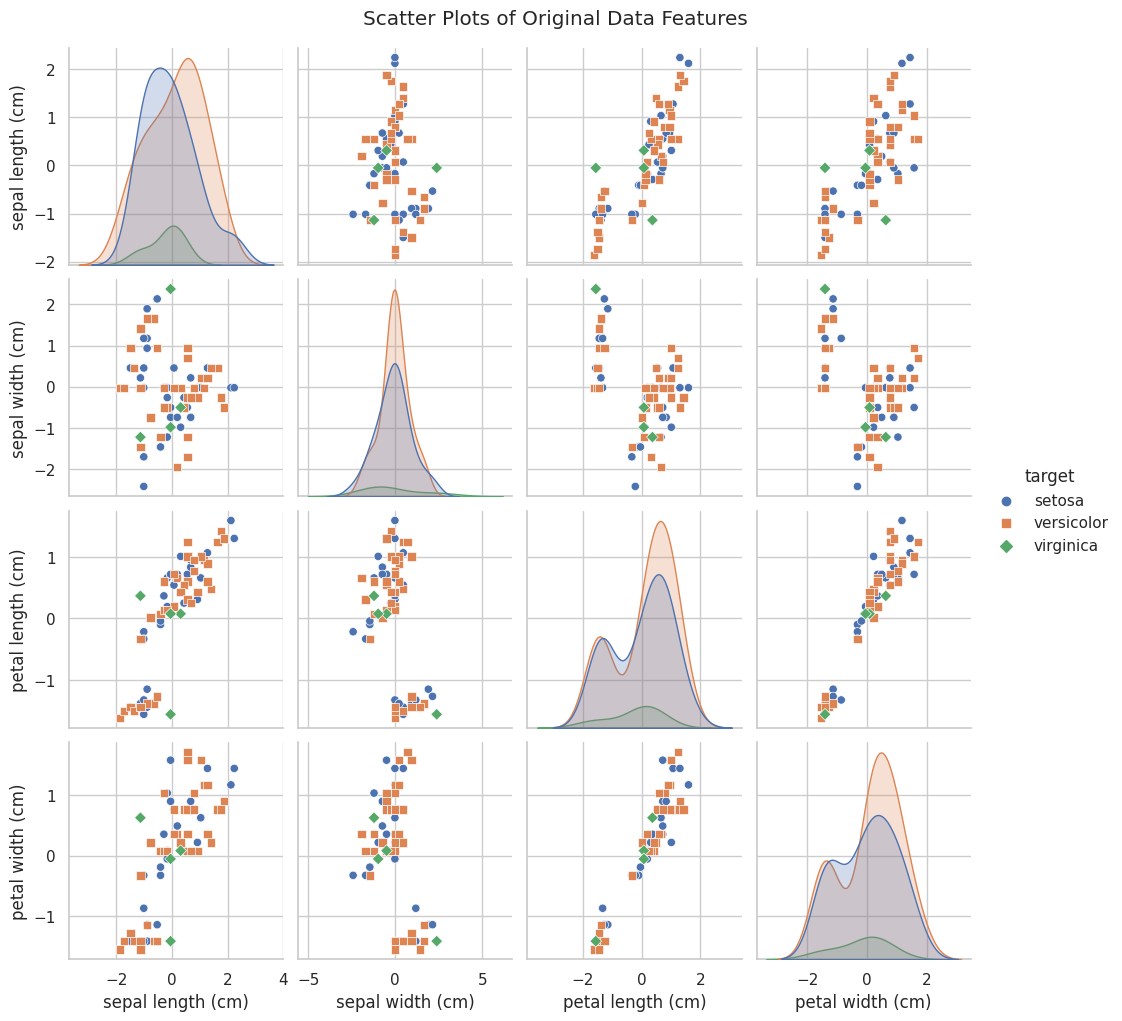

In [3]:
# 각 특성 간의 산점도 시각화
sns.set(style='whitegrid', context='notebook')
df_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_train['target'] = y_train.map(lambda i: target_names[i])
sns.pairplot(df_train, hue='target', markers=["o", "s", "D"])
plt.suptitle('Scatter Plots of Original Data Features', y=1.02)
plt.show()

#### PCA 차원 축소 적용

[0.7070102  0.24507687 0.04266747 0.00524546]


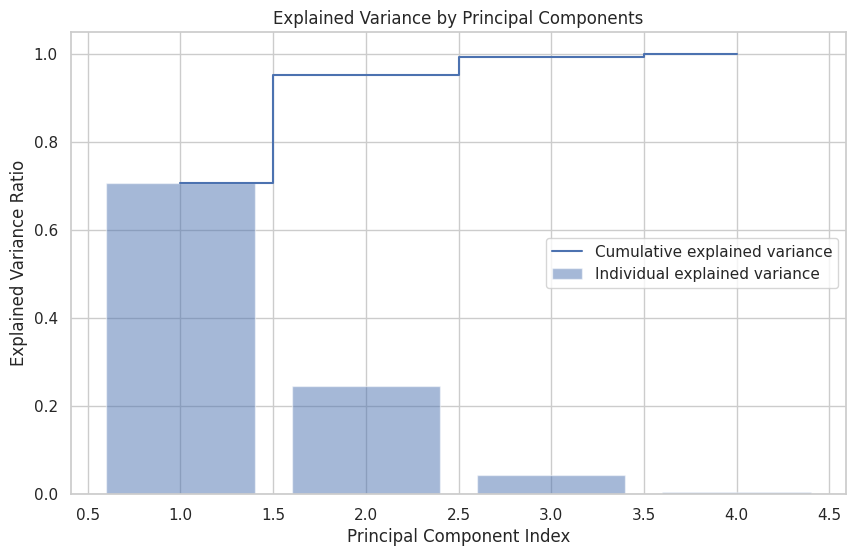

In [4]:
# PCA 변환 (모든 주성분)
pca_full = PCA()
pca_full.fit(X_train)

# 주성분의 설명력
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(explained_variance)

# 설명력 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

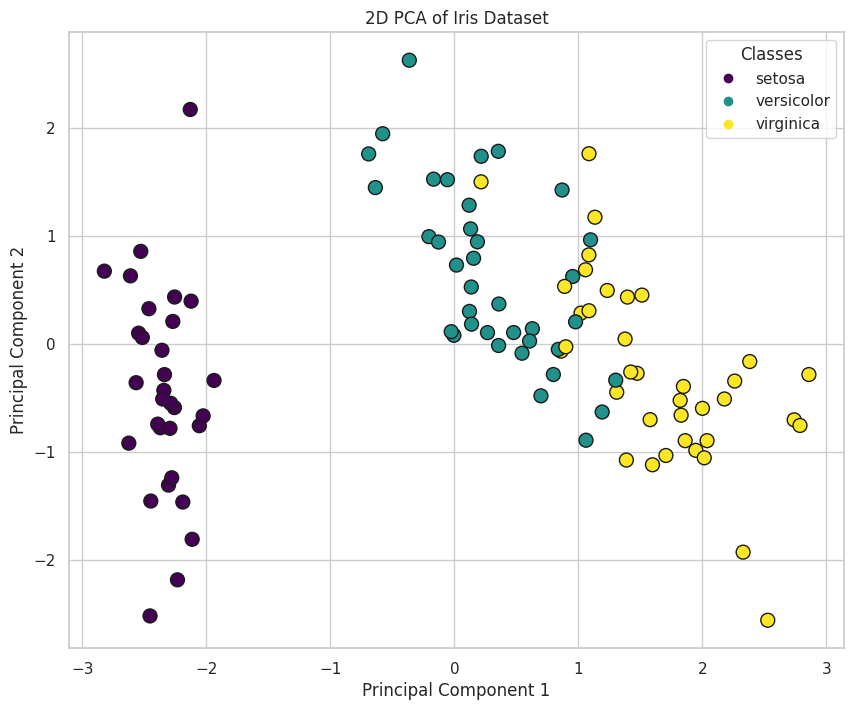

In [5]:
# PCA 변환 (2개 주성분)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2차원 산점도 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
handles, labels = scatter.legend_elements(prop="colors")
labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
plt.legend(handles, labels, title="Classes")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.show()

#### SVM 모델 학습(PCA 없이)

In [6]:
# SVM 모델 학습 (PCA 없이)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 모델 예측 (PCA 없이)
y_pred = svm.predict(X_test)

# 평가 (PCA 없이)
print("Evaluation without PCA")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Evaluation without PCA
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



#### SVM 모델 학습(PCA 적용)

In [7]:
# 2개의 주성분을 사용하여 PCA 변환
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)
X_test_pca_2d = pca_2d.transform(X_test)

# SVM 모델 학습 (2개의 주성분)
svm_pca_2d = SVC(kernel='linear')
svm_pca_2d.fit(X_train_pca_2d, y_train)

# 모델 예측 (PCA 적용)
y_pred_pca = svm_pca_2d.predict(X_test_pca_2d)

# 평가 (PCA 적용)
print("Evaluation with PCA")
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Evaluation with PCA
[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



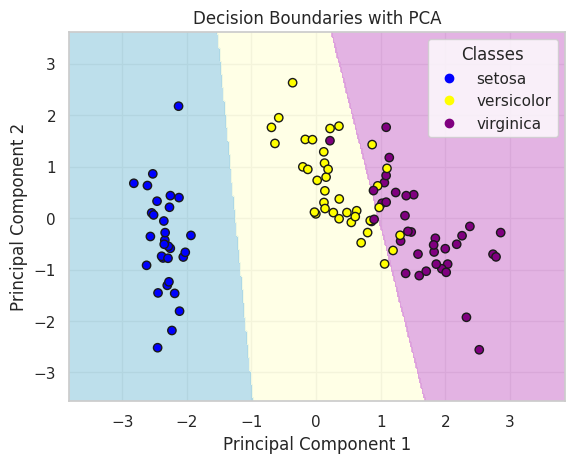

In [8]:
# 결정 경계 시각화 함수
def plot_decision_boundaries(X, y, model, target_names, title='Decision Boundaries'):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary by assigning a color to each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightyellow', 'plum')))

    # Plot also the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('blue', 'yellow', 'purple')))
    handles, labels = scatter.legend_elements(prop="colors")
    labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
    plt.legend(handles, labels, title="Classes")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

# 결정 경계 시각화
plot_decision_boundaries(X_train_pca, y_train, svm_pca_2d, target_names, title='Decision Boundaries with PCA')